In [12]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import manifold
import seaborn as sns
import umap
import bcolz
import numpy as np
import pickle
from nltk.tokenize import word_tokenize



# genecard summary embedding

In [2]:
genecard_summary = pd.read_csv('genecard_description_summary.csv',index_col=0,encoding = "ISO-8859-1")
genecard_summary[:5]

,type,description,summary_uniport,summary_entrez,summary_genecard,summary_Tocris,summary_CIViC
gene,,,,,,,
"""5-HT3C2""",Pseudogene,5-Hydroxytryptamine Receptor 3E Pseudogene,NaN,NaN,5-HT3C2 (5-Hydroxytryptamine Receptor 3E Pseud...,NaN,NaN
"""A1BG""",Protein Coding,Alpha-1-B Glycoprotein,NaN,The protein encoded by this gene is a plasma g...,A1BG (Alpha-1-B Glycoprotein) is a Protein Cod...,NaN,NaN
"""A1BG-AS1""",RNA Gene,A1BG Antisense RNA 1,NaN,NaN,A1BG-AS1 (A1BG Antisense RNA 1) is an RNA Gene...,NaN,NaN
"""A1CF""",Protein Coding,APOBEC1 Complementation Factor,"UniProtKB/Swiss-Prot for A1CF Gene A1CF_HUMAN,...",Mammalian apolipoprotein B mRNA undergoes site...,A1CF (APOBEC1 Complementation Factor) is a Pro...,NaN,NaN
"""A2M""",Protein Coding,Alpha-2-Macroglobulin,"UniProtKB/Swiss-Prot for A2M Gene A2MG_HUMAN,P...",The protein encoded by this gene is a protease...,A2M (Alpha-2-Macroglobulin) is a Protein Codin...,NaN,NaN


In [3]:
ranked_feat = pd.read_csv('feature_importance.csv',index_col=0,encoding = "ISO-8859-1")
ranked_feat[:5]
# the features have been ranked
#ranked_feat.sort_values(by=['gain_importance'],ascending=False)

,feat_name,gain_importance
feat_idx,,
737,IGKV2D-30,0.233296
278,TRAV38-1,0.112210
1062,F13A1,0.089844
428,CD207,0.080076
1690,PTGER2,0.032802


In [4]:
gene_list_from_scBALF=ranked_feat['feat_name'].tolist()
gene_list={}

#genecard_summary.loc['"A2M"']
for index, row in genecard_summary.iterrows():
    if index[1:-1] not in gene_list_from_scBALF:
        continue
    gene_list[index[1:-1]] = row


In [43]:
print(gene_list['A2M'])
type(gene_list['A2M'].loc['summary_Tocris'])


type                                                   Protein Coding
description                                     Alpha-2-Macroglobulin
summary_uniport     UniProtKB/Swiss-Prot for A2M Gene A2MG_HUMAN,P...
summary_entrez      The protein encoded by this gene is a protease...
summary_genecard    A2M (Alpha-2-Macroglobulin) is a Protein Codin...
summary_Tocris                                                    NaN
summary_CIViC                                                     NaN
Name: "A2M", dtype: object


float

In [65]:
print(type(gene_list['A2M']))
print(dd.keys().tolist())
gene_list['IGKV2D-30']

<class 'pandas.core.series.Series'>
['type', 'description', 'summary_uniport', 'summary_entrez', 'summary_genecard', 'summary_Tocris', 'summary_CIViC']


type                                                   Protein Coding
description                       Immunoglobulin Kappa Variable 2D-30
summary_uniport     UniProtKB/Swiss-Prot for IGKV2D-30 Gene KVD30_...
summary_entrez                                                    NaN
summary_genecard    IGKV2D-30 (Immunoglobulin Kappa Variable 2D-30...
summary_Tocris                                                    NaN
summary_CIViC                                                     NaN
Name: "IGKV2D-30", dtype: object

In [12]:
gene_list['IGKV2D-30'].description

'Immunoglobulin Kappa Variable 2D-30'

# Append summaries to the ranked_feat

In [25]:
#ranked_feat['summary_text'] = True
summary_text = {}
for index, row in ranked_feat.iterrows():
    meta_text=''
    gene = row['feat_name']
    if gene not in gene_list:
        summary_text[index] = 'Nan'
        continue        
    for key in gene_list[gene].keys().tolist():
        if type(gene_list[gene].loc[key]) is not str:
            continue
        #meta_text.append(gene_list[gene].loc[key]) 
        meta_text+= ' ' + gene_list[gene].loc[key]
    summary_text[index] = meta_text  

In [26]:
summary_text
ranked_feat['summary_text'] = summary_text.values()
ranked_feat

,feat_name,gain_importance,summary_text
feat_idx,,,
737,IGKV2D-30,0.233296,Protein Coding Immunoglobulin Kappa Variable ...
278,TRAV38-1,0.112210,Protein Coding T Cell Receptor Alpha Variable...
1062,F13A1,0.089844,Protein Coding Coagulation Factor XIII A Chai...
428,CD207,0.080076,Protein Coding CD207 Molecule UniProtKB/Swiss...
1690,PTGER2,0.032802,Protein Coding Prostaglandin E Receptor 2 Uni...
...,...,...,...
885,ARMC3,0.000000,Protein Coding Armadillo Repeat Containing 3 ...
884,RDH10,0.000000,Protein Coding Retinol Dehydrogenase 10 UniPr...
883,SPINK2,0.000000,"Protein Coding Serine Peptidase Inhibitor, Ka..."


In [33]:
#nltk.download('punkt')
row_text = ranked_feat.loc[737]["summary_text"]
tokenized_sents = word_tokenize(row_text) 
tokenized_sents

['Protein',
 'Coding',
 'Immunoglobulin',
 'Kappa',
 'Variable',
 '2D-30',
 'UniProtKB/Swiss-Prot',
 'for',
 'IGKV2D-30',
 'Gene',
 'KVD30_HUMAN',
 ',',
 'A0A075B6S6',
 'V',
 'region',
 'of',
 'the',
 'variable',
 'domain',
 'of',
 'immunoglobulin',
 'light',
 'chains',
 'that',
 'participates',
 'in',
 'the',
 'antigen',
 'recognition',
 '(',
 'PubMed:24600447',
 ')',
 '.',
 'Immunoglobulins',
 ',',
 'also',
 'known',
 'as',
 'antibodies',
 ',',
 'are',
 'membrane-bound',
 'or',
 'secreted',
 'glycoproteins',
 'produced',
 'by',
 'B',
 'lymphocytes',
 '.',
 'In',
 'the',
 'recognition',
 'phase',
 'of',
 'humoral',
 'immunity',
 ',',
 'the',
 'membrane-bound',
 'immunoglobulins',
 'serve',
 'as',
 'receptors',
 'which',
 ',',
 'upon',
 'binding',
 'of',
 'a',
 'specific',
 'antigen',
 ',',
 'trigger',
 'the',
 'clonal',
 'expansion',
 'and',
 'differentiation',
 'of',
 'B',
 'lymphocytes',
 'into',
 'immunoglobulins-secreting',
 'plasma',
 'cells',
 '.',
 'Secreted',
 'immunoglobulins

In [31]:
#target_vocab = ranked_feat['summary_text'].str.split(expand=True)
#target_vocab
ranked_feat["unigrams"] = ranked_feat["summary_text"].apply(nltk.word_tokenize)

In [32]:
ranked_feat

,feat_name,gain_importance,summary_text,unigrams
feat_idx,,,,
737,IGKV2D-30,0.233296,Protein Coding Immunoglobulin Kappa Variable ...,"[Protein, Coding, Immunoglobulin, Kappa, Varia..."
278,TRAV38-1,0.112210,Protein Coding T Cell Receptor Alpha Variable...,"[Protein, Coding, T, Cell, Receptor, Alpha, Va..."
1062,F13A1,0.089844,Protein Coding Coagulation Factor XIII A Chai...,"[Protein, Coding, Coagulation, Factor, XIII, A..."
428,CD207,0.080076,Protein Coding CD207 Molecule UniProtKB/Swiss...,"[Protein, Coding, CD207, Molecule, UniProtKB/S..."
1690,PTGER2,0.032802,Protein Coding Prostaglandin E Receptor 2 Uni...,"[Protein, Coding, Prostaglandin, E, Receptor, ..."
...,...,...,...,...
885,ARMC3,0.000000,Protein Coding Armadillo Repeat Containing 3 ...,"[Protein, Coding, Armadillo, Repeat, Containin..."
884,RDH10,0.000000,Protein Coding Retinol Dehydrogenase 10 UniPr...,"[Protein, Coding, Retinol, Dehydrogenase, 10, ..."
883,SPINK2,0.000000,"Protein Coding Serine Peptidase Inhibitor, Ka...","[Protein, Coding, Serine, Peptidase, Inhibitor..."


In [106]:
gene= 'IGKV2D-30'
print( gene_list[gene])
meta_text=[]
for key in gene_list[gene].keys().tolist():
    if type(gene_list[gene].loc[key]) is not str:
        continue
    meta_text.append(gene_list[gene].loc[key]) 

print(meta_text)
ranked_feat.loc[1]['summary_text']=meta_text

type                                                   Protein Coding
description                       Immunoglobulin Kappa Variable 2D-30
summary_uniport     UniProtKB/Swiss-Prot for IGKV2D-30 Gene KVD30_...
summary_entrez                                                    NaN
summary_genecard    IGKV2D-30 (Immunoglobulin Kappa Variable 2D-30...
summary_Tocris                                                    NaN
summary_CIViC                                                     NaN
Name: "IGKV2D-30", dtype: object
['Protein Coding', 'Immunoglobulin Kappa Variable 2D-30', 'UniProtKB/Swiss-Prot for IGKV2D-30 Gene KVD30_HUMAN,A0A075B6S6 V region of the variable domain of immunoglobulin light chains that participates in the antigen recognition (PubMed:24600447). Immunoglobulins, also known as antibodies, are membrane-bound or secreted glycoproteins produced by B lymphocytes. In the recognition phase of humoral immunity, the membrane-bound immunoglobulins serve as receptors which, upon b

C:\Users\Emma\anaconda3\envs\myhgt_py37\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


# Use pre-trained word embedding 

In [33]:
words = []
idx = 0
word2idx = {}
#vectors = bcolz.carray(np.zeros(1), rootdir=f'{glove_path}/6B.50.dat', mode='w')
vectors = bcolz.carray(np.zeros(1), rootdir=f'glove.6B.50.dat', mode='w')

with open(f'glove.6B.50d.txt', 'rb') as f:
    for l in f:
        line = l.decode().split()
        word = line[0]
        words.append(word)
        word2idx[word] = idx
        idx += 1
        vect = np.array(line[1:]).astype(np.float)
        vectors.append(vect)

C:\Users\Emma\anaconda3\envs\myhgt_py37\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [36]:
print(vectors.shape)
len(words)
len(word2idx)

(20000051,)


400001

In [37]:
vectors = bcolz.carray(vectors[1:].reshape((400001, 50)), rootdir=f'glove.6B.50.dat', mode='w')
vectors.flush()
pickle.dump(words, open(f'glove.6B.50_words.pkl', 'wb'))
pickle.dump(word2idx, open(f'glove.6B.50_idx.pkl', 'wb'))

In [35]:
'''
vectors = bcolz.open(f'{glove_path}/6B.50.dat')[:]
words = pickle.load(open(f'{glove_path}/6B.50_words.pkl', 'rb'))
word2idx = pickle.load(open(f'{glove_path}/6B.50_idx.pkl', 'rb'))
'''

vectors = bcolz.open(f'glove.6B.50.dat')[:]
words = pickle.load(open(f'glove.6B.50_words.pkl', 'rb'))
word2idx = pickle.load(open(f'glove.6B.50_idx.pkl', 'rb'))


glove = {w: vectors[word2idx[w]] for w in words}

In [36]:
glove['the']

array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
       -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
        2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
        1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
       -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
       -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
        4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
        7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
       -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
        1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])

In [57]:
len(ranked_feat)

1999

In [58]:
emb = {}
emb_dim = 50
array_id = 0
emb_array = np.zeros((len(ranked_feat), 50))
for index, row in ranked_feat.iterrows():
    target_vocab = row['unigrams']
    matrix_len = len(target_vocab)
    weights_matrix = np.zeros((matrix_len, 50))
    words_found = 0

    for i, word in enumerate(target_vocab):
        try: 
            weights_matrix[i] = glove[word]
            words_found += 1
        except KeyError:
            weights_matrix[i] = np.random.normal(scale=0.6, size=(emb_dim, ))
    
    emb[index] = np.mean(weights_matrix,axis=0)
    emb_array[array_id,:] = np.mean(weights_matrix,axis=0)

In [50]:
ranked_feat['emb'] = emb.values()
ranked_feat

,feat_name,gain_importance,summary_text,unigrams,emb
feat_idx,,,,,
737,IGKV2D-30,0.233296,Protein Coding Immunoglobulin Kappa Variable ...,"[Protein, Coding, Immunoglobulin, Kappa, Varia...","[0.4025923331591497, 0.24366823206854227, -0.0..."
278,TRAV38-1,0.112210,Protein Coding T Cell Receptor Alpha Variable...,"[Protein, Coding, T, Cell, Receptor, Alpha, Va...","[0.4064585874309397, 0.2504547174394831, 0.037..."
1062,F13A1,0.089844,Protein Coding Coagulation Factor XIII A Chai...,"[Protein, Coding, Coagulation, Factor, XIII, A...","[0.3023762365258256, 0.1337848549537341, -0.03..."
428,CD207,0.080076,Protein Coding CD207 Molecule UniProtKB/Swiss...,"[Protein, Coding, CD207, Molecule, UniProtKB/S...","[0.3431770495280346, 0.19003381086394394, -0.0..."
1690,PTGER2,0.032802,Protein Coding Prostaglandin E Receptor 2 Uni...,"[Protein, Coding, Prostaglandin, E, Receptor, ...","[0.29977404483118636, 0.2188301040997344, -0.0..."
...,...,...,...,...,...
885,ARMC3,0.000000,Protein Coding Armadillo Repeat Containing 3 ...,"[Protein, Coding, Armadillo, Repeat, Containin...","[0.22173076857186994, 0.30448645547676306, -0...."
884,RDH10,0.000000,Protein Coding Retinol Dehydrogenase 10 UniPr...,"[Protein, Coding, Retinol, Dehydrogenase, 10, ...","[0.23351070340057203, 0.24105720736813077, -0...."
883,SPINK2,0.000000,"Protein Coding Serine Peptidase Inhibitor, Ka...","[Protein, Coding, Serine, Peptidase, Inhibitor...","[0.2957856309224273, 0.09222452282933617, -0.1..."


In [67]:
# U-map 
reducer = umap.UMAP(n_neighbors= 15)
umap_x = reducer.fit_transform(emb_array)
#umap_x.shape

C:\Users\Emma\anaconda3\envs\myhgt_py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


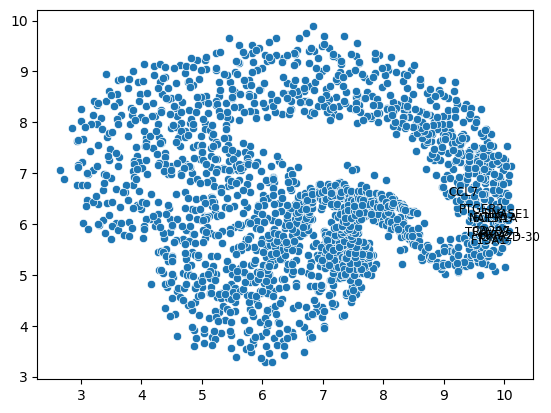

In [75]:
#palette = sns.color_palette("bright", 3)
#sns.scatterplot(umap_x[:,0], umap_x[:,1], hue=ranked_feat['feat_name'],legend='full', palette=palette)
ax = sns.scatterplot(umap_x[:,0], umap_x[:,1])

for index, (x,y) in enumerate(zip(umap_x[:,0], umap_x[:,1])):
    if index < 10:
        ax.text(x+0.01, y, ranked_feat.iloc[index]['feat_name'], horizontalalignment='left', size='small', color='black')


plt.show()

In [109]:
# t-SNE
tsne = manifold.TSNE(n_components=2, init='pca', random_state=5)
X_tsne = tsne.fit_transform(emb_array)

'''嵌入空间可视化'''
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
tsne_x = (X_tsne - x_min) / (x_max - x_min)  # 归一化
tsne_x.shape

(1999, 2)

In [110]:
tsne_x

array([[1.        , 0.5240297 ],
       [0.5603338 , 0.9942279 ],
       [0.84623283, 0.8877063 ],
       ...,
       [0.4851199 , 0.5972743 ],
       [0.4851199 , 0.5972743 ],
       [0.4851199 , 0.5972743 ]], dtype=float32)

C:\Users\Emma\anaconda3\envs\myhgt_py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


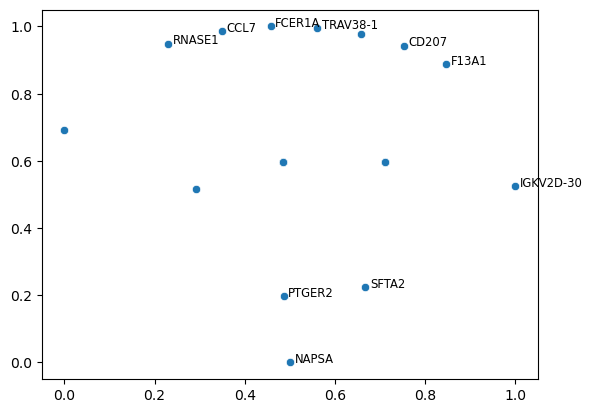

In [111]:
#sns.scatterplot(tsne_x[:,0], tsne_x[:,1], hue=label['type'],legend='full', palette=palette)
ax = sns.scatterplot(tsne_x[:,0], tsne_x[:,1],legend='full')
for index, (x,y) in enumerate(zip(tsne_x[:,0], tsne_x[:,1])):
    if index < 10:
        ax.text(x+0.01, y, ranked_feat.iloc[index]['feat_name'], horizontalalignment='left', size='small', color='black')
plt.show()